# Projeto Kaggle Titanic

Autor: Roberto Haruo Lopes Fuzimoto
Projeto: Criar modelo de machine learning para prever quais passageiros do navio Titanic iram sobreviver ao naufrágio.

In [1]:
# Bibliotecas
import pandas as pd
import numpy as np
from pandas import DataFrame

# matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font_scale=1)
%matplotlib inline

# machine learning
from sklearn.ensemble import RandomForestClassifier

In [2]:
#data_train = pd.read_csv('../input/train.csv')
#data_train = pd.read_csv('../input/test.csv'

In [3]:
# Carregando dados de treino e teste
data_train = pd.read_csv("train.csv")
data_train = pd.DataFrame(data_train)
data_test = pd.read_csv("test.csv")
data_test = pd.DataFrame(data_test)

In [4]:
data_train_copy = data_train.copy()
data_train_copy.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
data_train_copy.info()
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float

In [6]:
data_train_copy.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# Fare

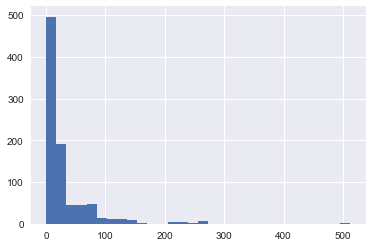

In [7]:
#%matplotlib notebook
 
data_train_copy['Fare'].hist(bins=30)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f3a343f50f0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f3a3423f358>]], dtype=object)

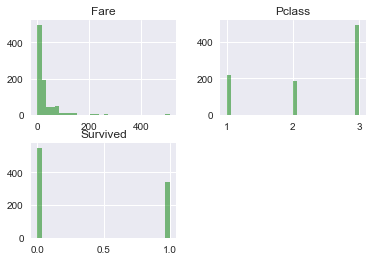

In [8]:
#%matplotlib notebook

data_train_copy[['Fare','Pclass', 'Survived']].hist(bins = 30, alpha = 0.5, color = 'Green')

In [9]:
data_train_copy['Fare'].mean()

32.2042079685746

In [10]:
data_train_copy.skew() # Esse método retorna o valor de simetria de cada coluna do dataset.

PassengerId    0.000000
Survived       0.478523
Pclass        -0.630548
Age            0.389108
SibSp          3.695352
Parch          2.749117
Fare           4.787317
dtype: float64

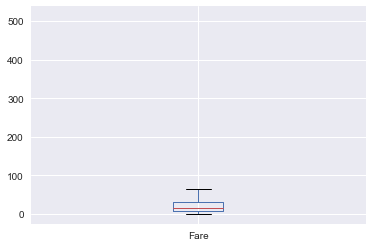

In [11]:
#%matplotlib notebook

#matplotlib.style.use('ggplot')
data_train_copy.boxplot(column='Fare')

/home/rfuzi/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


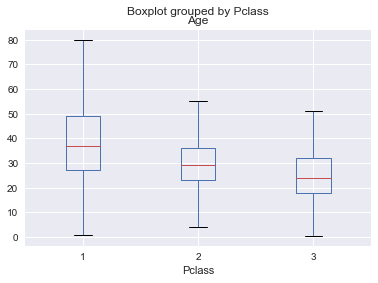

In [12]:
#%matplotlib notebook

data_train_copy.boxplot(column='Age', by = 'Pclass')

In [13]:
data_train_copy.corr() #Veja que com o método corr() do pandas podemos calcular a correlação entre todas as colunas do dataset.

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


In [14]:
data_train_copy[['Survived', 'Fare','Parch', 'Age','Pclass']].corr()

# Preço é uma das variáveis em comum com a de Sobrevivente

,Survived,Fare,Parch,Age,Pclass
Survived,1.000000,0.257307,0.081629,-0.077221,-0.338481
Fare,0.257307,1.000000,0.216225,0.096067,-0.549500
Parch,0.081629,0.216225,1.000000,-0.189119,0.018443
Age,-0.077221,0.096067,-0.189119,1.000000,-0.369226
Pclass,-0.338481,-0.549500,0.018443,-0.369226,1.000000


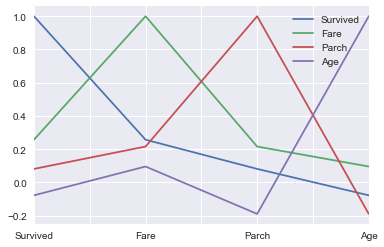

In [15]:
#%matplotlib notebook

data_train_copy[['Survived', 'Fare','Parch','Age']].corr().plot()

In [16]:
data_train_copy.pivot_table('PassengerId', index=['Pclass', 'Survived'], aggfunc='count', margins=True)

PassengerId
Pclass Survived             
1      0                80.0
       1               136.0
2      0                97.0
       1                87.0
3      0               372.0
       1               119.0
All                    891.0

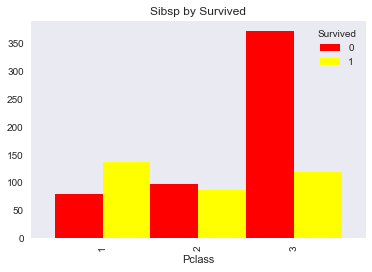

In [17]:
table = pd.crosstab(data_train_copy['Pclass'], data_train_copy['Survived'])
table.plot(kind='bar',width=1.0, color=['red','yellow','orange','blue','green'], title='Sibsp by Survived' ,grid=False)

# Embarked 

In [18]:
data_train_copy[data_train_copy['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


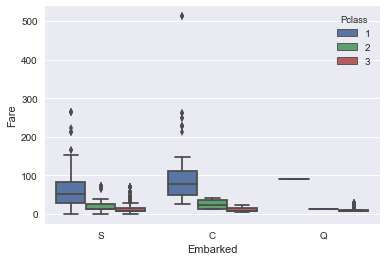

In [19]:
#%matplotlib notebook

sns.boxplot(x="Embarked", y="Fare", hue="Pclass", data=data_train_copy);

In [20]:
# Visto que os valores missging na coluna Embarked o preço da passagem de 80 e classe Social 1
# os passageiros embarcaram no C.
data_train_copy["Embarked"] = data_train_copy["Embarked"].fillna('C')
data_train["Embarked"] = data_train["Embarked"].fillna('C')

In [21]:
data_train_copy['Embarked'].isnull().sum()

0

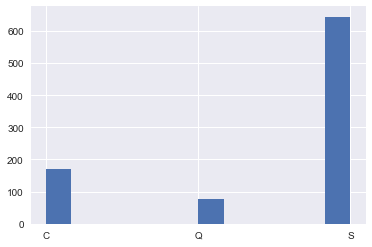

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [22]:
#%matplotlib notebook

plt.hist(data_train_copy['Embarked'], bins=12)
plt.show()
data_train.dtypes

# Pclass

In [23]:
data_train_copy['Pclass'] = data_train_copy['Pclass'].astype(object)

In [24]:
data_train_copy['Pclass'] = pd.cut(data_train_copy['Pclass'], 3, labels=['Alta', 'Média', 'Baixa'])

In [25]:
# Classificar as variáveis e apresentar médias.
# Pclass
data_train_copy[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)
data_train_copy.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,Baixa,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,Alta,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,Baixa,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,Alta,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,Baixa,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Survived    0    1
Pclass            
Alta       80  136
Média      97   87
Baixa     372  119


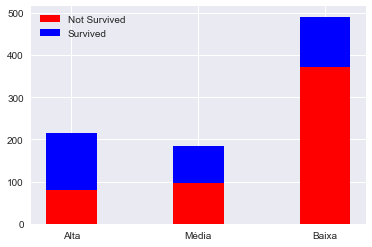

In [26]:
#%matplotlib notebook

# Gráfico de Barras Classe Social vs Sobrevivnetes.

tabela = pd.pivot_table(data=data_train_copy,values='PassengerId', index='Pclass', columns='Survived', aggfunc='count')
print(tabela)


# Array com os não-sobreviventes, divididos em classe Social, Alta, Média e Baixa.
bar_1 = tabela[0]
# Array com os sobreviventes, divididos em classe social Alta, Média e Baixa.
bar_2 = tabela[1]
# Range com a quantidade de itens das barras.
x_pos = np.arange(len(bar_1))

first_bar = plt.bar(x_pos, bar_1, 0.4, color='r')
second_bar = plt.bar(x_pos, bar_2, 0.4, color='b', bottom=bar_1)
# Definir posição e labels no eixo X.
plt.xticks(x_pos, ('Alta','Média','Baixa'))
plt.legend((first_bar[0],second_bar[0]),('Not Survived', 'Survived'))
plt.show()

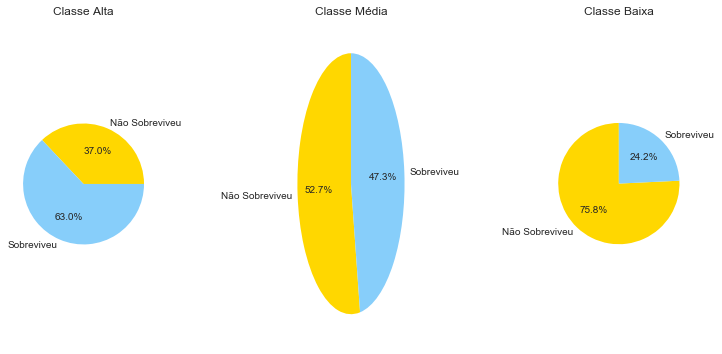

In [27]:
#%matplotlib notebook

# Gráfico de Pizza

# Cria os arrays com os valores de sobrevivência e não sobrevivência por sexo
pie_alta = tabela.loc['Alta']
pie_media = tabela.loc['Média']
pie_baixa = tabela.loc['Baixa']

# Criação da figure com uma linha e duas colunas. Figsize define o tamanho da
# figure
fig, eixos = plt.subplots(nrows=1, ncols=3, figsize=(12,6))
# Cria o gráfico de pizza na primeira posição com as configurações definidas
pie_1 = eixos[0].pie(pie_alta, labels=['Não Sobreviveu','Sobreviveu'],
                    autopct='%1.1f%%', colors=['gold', 'lightskyblue'])

# Define o título deste gráfico
eixos[0].set_title('Classe Alta')

# Deixa os dois eixos iguais, fazendo com que o gráfico mantenha-se redondo
eixos[0].axis('equal')

# Gráfico da Classe Média
pie_2 = eixos[1].pie(pie_media, labels=['Não Sobreviveu','Sobreviveu'], 
                    autopct='%1.1f%%', startangle=90, colors=['gold', 'lightskyblue'])
eixos[1].set_title('Classe Média')
plt.axis('equal')

# Gráfico da Classe Baixa
pie_3 = eixos[2].pie(pie_baixa,labels=['Não Sobreviveu','Sobreviveu'], 
                    autopct='%1.1f%%', startangle=90, colors=['gold', 'lightskyblue'])

eixos[2].set_title('Classe Baixa')
plt.axis('equal')


# Ajusta o espaço entre os dois gráficos
plt.subplots_adjust(wspace=1)
plt.show()

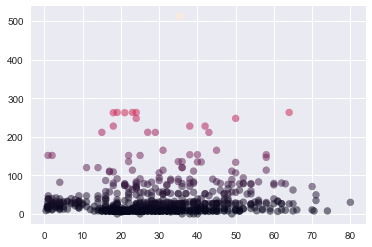

In [28]:
#%matplotlib notebook

# Scatter Plot

scatter_plot = plt.scatter(data_train_copy['Age'], data_train['Fare'], alpha=0.5, 
                           c=data_train_copy['Fare'])
plt.show()

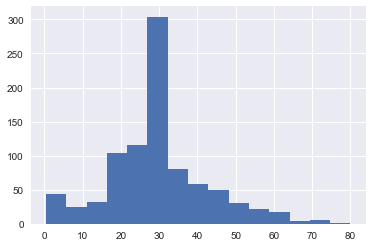

In [29]:
#%matplotlib notebook

# Histograma

data_train_copy['Age'].fillna(data_train_copy['Age'].mean(), inplace=True)
histogram_example = plt.hist(data_train_copy['Age'], bins=15)
plt.show()

In [30]:
tabela = pd.pivot_table(data=data_train_copy,values='PassengerId', index='Embarked', columns='Survived', aggfunc='count')
print(tabela)

Survived    0    1
Embarked          
C          75   95
Q          47   30
S         427  217


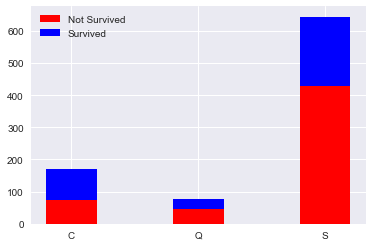

In [31]:
#%matplotlib notebook

# Gráfico Embarked

# Array com os não-sobreviventes.
bar_1 = tabela[0]
# Array com os sobreviventes.
bar_2 = tabela[1]
# Range com a quantidade de itens das barras.
x_pos = np.arange(len(bar_1))

first_bar = plt.bar(x_pos, bar_1, 0.4, color='r')
second_bar = plt.bar(x_pos, bar_2, 0.4, color='b', bottom=bar_1)
# Definir posição e labels no eixo X.
plt.xticks(x_pos, ('C','Q','S'))
plt.legend((first_bar[0],second_bar[0]),('Not Survived', 'Survived'))
plt.show()

# Age

In [32]:
#Age
idades = np.any([0, 30, 50, 100])
data_train_copy['Age'] = pd.cut(data_train_copy['Age'], 3, idades, labels=['Jovem', 'Adulto', 'Idoso'] )

Survived    0    1
Age               
Jovem     189  130
Adulto    326  196
Idoso      34   16


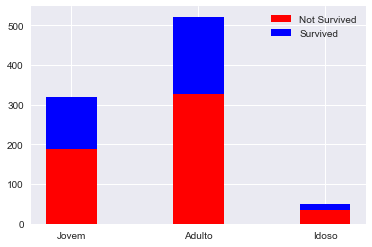

In [33]:
#%matplotlib notebook

# Gráfico por Idade

tabela = pd.pivot_table(data=data_train_copy,values='PassengerId', index='Age', columns='Survived', aggfunc='count')
print(tabela)

# Array com os não-sobreviventes.
bar_1 = tabela[0]
# Array com os sobreviventes.
bar_2 = tabela[1]
# Range com a quantidade de itens das barras.
x_pos = np.arange(len(bar_1))

first_bar = plt.bar(x_pos, bar_1, 0.4, color='r')
second_bar = plt.bar(x_pos, bar_2, 0.4, color='b', bottom=bar_1)

# Definir posição e labels no eixo X.
plt.xticks(x_pos, ('Jovem','Adulto','Idoso'))
plt.legend((first_bar[0],second_bar[0]),('Not Survived', 'Survived'))
plt.show()

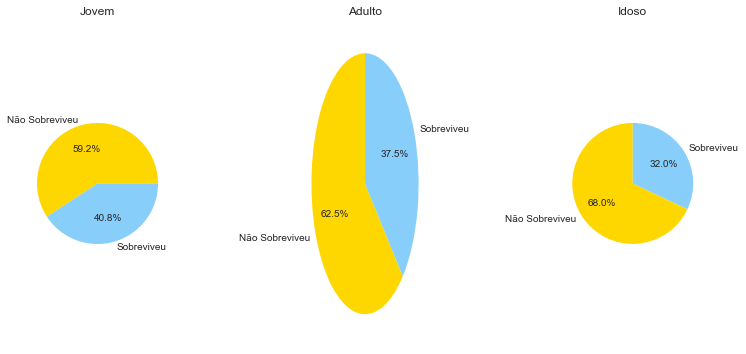

In [34]:
#%matplotlib notebook

# Gráfico de Pizza por Idade

# Cria os arrays com os valores de sobrevivência e não sobrevivência por sexo
pie_jovem = tabela.loc['Jovem']
pie_adulto = tabela.loc['Adulto']
pie_idoso = tabela.loc['Idoso']

# Criação da figure com uma linha e duas colunas. Figsize define o tamanho da
# figure
fig, eixos = plt.subplots(nrows=1, ncols=3, figsize=(12,6))
# Cria o gráfico de pizza na primeira posição com as configurações definidas
pie_1 = eixos[0].pie(pie_jovem, labels=['Não Sobreviveu','Sobreviveu'],
                    autopct='%1.1f%%', colors=['gold', 'lightskyblue'])

# Define o título deste gráfico
eixos[0].set_title('Jovem')

# Deixa os dois eixos iguais, fazendo com que o gráfico mantenha-se redondo
eixos[0].axis('equal')

# Gráfico da Classe Média
pie_2 = eixos[1].pie(pie_adulto, labels=['Não Sobreviveu','Sobreviveu'], 
                    autopct='%1.1f%%', startangle=90, colors=['gold', 'lightskyblue'])
eixos[1].set_title('Adulto')
plt.axis('equal')

# Gráfico da Classe Baixa
pie_3 = eixos[2].pie(pie_idoso,labels=['Não Sobreviveu','Sobreviveu'], 
                    autopct='%1.1f%%', startangle=90, colors=['gold', 'lightskyblue'])

eixos[2].set_title('Idoso')
plt.axis('equal')


# Ajusta o espaço entre os dois gráficos
plt.subplots_adjust(wspace=1)
plt.show()


#  Modelo Preditivo

# SEX

In [35]:
combine = [data_train, data_test]
for x in combine:
    x['Sex'] = x['Sex'].map( {'female': 1, 'male': 0} ).astype(int)

data_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S


# Age

In [36]:
data_train[data_train['Age'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",0,NaN,0,0,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",0,NaN,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",1,NaN,0,0,2649,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",0,NaN,0,0,2631,7.2250,NaN,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",1,NaN,0,0,330959,7.8792,NaN,Q
29,30,0,3,"Todoroff, Mr. Lalio",0,NaN,0,0,349216,7.8958,NaN,S
31,32,1,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",1,NaN,1,0,PC 17569,146.5208,B78,C
32,33,1,3,"Glynn, Miss. Mary Agatha",1,NaN,0,0,335677,7.7500,NaN,Q
36,37,1,3,"Mamee, Mr. Hanna",0,NaN,0,0,2677,7.2292,NaN,C
42,43,0,3,"Kraeff, Mr. Theodor",0,NaN,0,0,349253,7.8958,NaN,C


In [37]:
guess_ages = np.zeros((2,3))
guess_ages

array([[ 0.,  0.,  0.],
       [ 0.,  0.,  0.]])

In [38]:
for dataset in combine:
    for i in range(0, 2):
        for j in range(0, 3):
            guess_df = dataset[(dataset['Sex'] == i) & \
                                  (dataset['Pclass'] == j+1)]['Age'].dropna()

            
            age_guess = guess_df.median()

            # Convert random age float to nearest .5 age
            guess_ages[i,j] = int( age_guess/0.5 + 0.5 ) * 0.5
            
    for i in range(0, 2):
        for j in range(0, 3):
            dataset.loc[ (dataset.Age.isnull()) & (dataset.Sex == i) & (dataset.Pclass == j+1),\
                    'Age'] = guess_ages[i,j]

    dataset['Age'] = dataset['Age'].astype(int)

data_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",0,35,0,0,373450,8.0500,NaN,S


In [39]:
data_train['AgeBand'] = pd.cut(data_train['Age'], 5)
data_train[['AgeBand', 'Survived']].groupby(['AgeBand'], as_index=False).mean().sort_values(by='AgeBand', ascending=True)

,AgeBand,Survived
0,"(-0.08, 16.0]",0.550000
1,"(16.0, 32.0]",0.337374
2,"(32.0, 48.0]",0.412037
3,"(48.0, 64.0]",0.434783
4,"(64.0, 80.0]",0.090909


In [40]:
for dataset in combine:    
    dataset.loc[ dataset['Age'] <= 16, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3
    dataset.loc[ dataset['Age'] > 64, 'Age']
data_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeBand
0,1,0,3,"Braund, Mr. Owen Harris",0,1,1,0,A/5 21171,7.2500,NaN,S,"(16.0, 32.0]"
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,2,1,0,PC 17599,71.2833,C85,C,"(32.0, 48.0]"
2,3,1,3,"Heikkinen, Miss. Laina",1,1,0,0,STON/O2. 3101282,7.9250,NaN,S,"(16.0, 32.0]"
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,2,1,0,113803,53.1000,C123,S,"(32.0, 48.0]"
4,5,0,3,"Allen, Mr. William Henry",0,2,0,0,373450,8.0500,NaN,S,"(32.0, 48.0]"


In [41]:
data_train = data_train.drop(['AgeBand'], axis=1)
combine = [data_train, data_test]
data_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,1,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,2,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",1,1,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,2,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",0,2,0,0,373450,8.0500,NaN,S


# Embarked

In [42]:
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)

data_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,1,1,0,A/5 21171,7.2500,NaN,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,2,1,0,PC 17599,71.2833,C85,1
2,3,1,3,"Heikkinen, Miss. Laina",1,1,0,0,STON/O2. 3101282,7.9250,NaN,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,2,1,0,113803,53.1000,C123,0
4,5,0,3,"Allen, Mr. William Henry",0,2,0,0,373450,8.0500,NaN,0


# Fare

In [43]:
data_test['Fare'].fillna(data_test['Fare'].dropna().median(), inplace=True)
data_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",0,2,0,0,330911,7.8292,NaN,2
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,2,1,0,363272,7.0000,NaN,0
2,894,2,"Myles, Mr. Thomas Francis",0,3,0,0,240276,9.6875,NaN,2
3,895,3,"Wirz, Mr. Albert",0,1,0,0,315154,8.6625,NaN,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,1,1,1,3101298,12.2875,NaN,0


In [44]:
data_train['FareBand'] = pd.qcut(data_train['Fare'], 4)
data_train[['FareBand', 'Survived']].groupby(['FareBand'], as_index=False).mean().sort_values(by='FareBand', ascending=True)

,FareBand,Survived
0,"(-0.001, 7.91]",0.197309
1,"(7.91, 14.454]",0.303571
2,"(14.454, 31.0]",0.454955
3,"(31.0, 512.329]",0.581081


In [45]:
for dataset in combine:
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[ dataset['Fare'] > 31, 'Fare'] = 3
    dataset['Fare'] = dataset['Fare'].astype(int)

data_train = data_train.drop(['FareBand'], axis=1)
combine = [data_train, data_test]
    
data_train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,1,1,0,A/5 21171,0,NaN,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,2,1,0,PC 17599,3,C85,1
2,3,1,3,"Heikkinen, Miss. Laina",1,1,0,0,STON/O2. 3101282,1,NaN,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,2,1,0,113803,3,C123,0
4,5,0,3,"Allen, Mr. William Henry",0,2,0,0,373450,1,NaN,0
5,6,0,3,"Moran, Mr. James",0,1,0,0,330877,1,NaN,2
6,7,0,1,"McCarthy, Mr. Timothy J",0,3,0,0,17463,3,E46,0
7,8,0,3,"Palsson, Master. Gosta Leonard",0,0,3,1,349909,2,NaN,0
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",1,1,0,2,347742,1,NaN,0
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",1,0,1,0,237736,2,NaN,1


In [46]:
# Excluir colunas desnecessária para analises e previsões
data_train = data_train.drop(['PassengerId','Name', 'Ticket','Cabin'], axis=1)
data_test = data_test.drop(['Name','Ticket','Cabin'], axis=1)

In [48]:
# Ordenar colunas
data_train = DataFrame(data_train, columns=['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked', 'Survived'])
data_train.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,3,0,1,1,0,0,0,0
1,1,1,2,1,0,3,1,1
2,3,1,1,0,0,1,0,1
3,1,1,2,1,0,3,0,1
4,3,0,2,0,0,1,0,0


In [49]:
X_train = data_train.drop("Survived", axis=1)
Y_train = data_train["Survived"]
X_test  = data_test.drop('PassengerId', axis=1).copy()
X_train.shape, Y_train.shape, X_test.shape

((891, 7), (891,), (418, 7))

In [50]:
X_train.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,0,1,1,0,0,0
1,1,1,2,1,0,3,1
2,3,1,1,0,0,1,0
3,1,1,2,1,0,3,0
4,3,0,2,0,0,1,0


# Random Forest

In [51]:
# Random Forests
random_forest = RandomForestClassifier(n_estimators=100)

In [52]:
random_forest.fit(X_train, Y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [53]:
Y_pred = random_forest.predict(X_test)

In [54]:
random_forest.score(X_train, Y_train)

0.88664421997755327

In [55]:
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
acc_random_forest

88.659999999999997

In [56]:
sample_submission_df = pd.DataFrame()

In [57]:
sample_submission_df['PassengerId'] = data_test['PassengerId']
sample_submission_df['Survived'] = Y_pred
sample_submission_df.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0


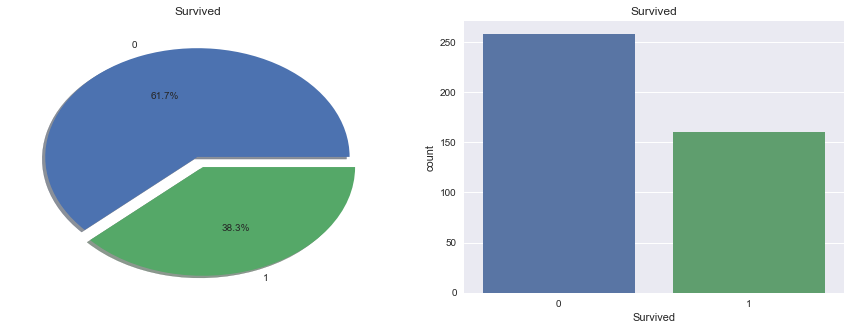

In [58]:
#%matplotlib notebook

f,ax=plt.subplots(1,2,figsize=(15,5))
sample_submission_df['Survived'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Survived')
ax[0].set_ylabel('')
sns.countplot('Survived',data=sample_submission_df,ax=ax[1])
ax[1].set_title('Survived')
plt.show()

O modelo preditivo contruido previu que 62,4% da tripulação do Titanic não iria sobreviver ao naufrágio e que 37,6 sobreviveriam.